In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import isodate
from transformers import pipeline

c:\Users\jenny\Youtube Data Analysis\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
trending_videos = pd.read_csv('trending_videos.csv')
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,Xud8zBvTUpI,"Love Island’s JaNa Craig, Leah Kateb & Serena ...","It’s the GQ Friendship Quiz, Love Island USA e...",2024-08-19T17:00:03Z,UCsEukrAd64fqA7FjwkmZ_Dw,GQ,24,"['couples quiz', 'friendship quiz', 'gq', 'gq ...",PT17M19S,hd,True,434554,32416,0,0,954
1,tXl1gU45jHA,We Trained For The OLYMPICS!,Welcome back guys!!! I think we need a bit mor...,2024-08-19T21:00:37Z,UC5sGdW8Jf7ijogDhcIFRmlw,Kalogeras Sisters,24,[],PT33M36S,hd,False,785190,44675,0,0,4061
2,OSGSROIs8cI,AI Simulates Civilization in Minecraft,Three of the worlds most powerful AI models (C...,2024-08-19T15:00:24Z,UCiVJZlfcmWMUiXv5oywnDhQ,Wifies,20,"['wifies', 'mumbo jumbo', 'dream']",PT27M36S,hd,False,606304,27380,0,0,2376
3,JApUMBscKOc,Nintendo Museum Direct,Join us for a brief tour of the Nintendo Museu...,2024-08-19T22:17:03Z,UCGIY_O-8vW4rfX98KlMkvRg,Nintendo of America,20,"['nintendo', 'game', 'fun', 'video game', 'act...",PT13M19S,hd,False,880007,54977,0,0,3256
4,KLsdwWrJOjA,Black Myth: Wukong,Travel across the world of Dr. Mundo in an att...,2024-08-19T19:30:02Z,UCsvn_Po0SmunchJYOWpOxMg,videogamedunkey,20,"['black myth wukong', 'wukong', 'dark souls', ...",PT5M59S,hd,False,821433,58865,0,0,2311


In [3]:
trending_videos.shape

(200, 16)

In [4]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     199 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [5]:
trending_videos.isnull().sum()

video_id          0
title             0
description       1
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

In [6]:
trending_videos['description'].fillna('No description', inplace = True)
# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\3474274818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace = True)


In [7]:
trending_videos.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,200.00000,2.000000e+02,2.000000e+02,200.0,200.0,200.00000
mean,18.83000,2.866843e+06,1.055421e+05,0.0,0.0,5364.08500
std,6.12525,1.290094e+07,4.504965e+05,0.0,0.0,14439.06368
min,1.00000,5.679800e+04,0.000000e+00,0.0,0.0,0.00000
25%,17.00000,4.379095e+05,1.291950e+04,0.0,0.0,978.50000
50%,20.00000,7.914845e+05,3.111800e+04,0.0,0.0,2301.50000
75%,24.00000,1.355567e+06,5.953800e+04,0.0,0.0,3707.25000
max,27.00000,1.588954e+08,4.951750e+06,0.0,0.0,149529.00000


In [8]:
trending_videos.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [9]:
trending_videos = trending_videos.drop(['video_id','channel_id','dislike_count','favorite_count'],axis = 1)

In [10]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   title          200 non-null    object             
 1   description    200 non-null    object             
 2   published_at   200 non-null    datetime64[ns, UTC]
 3   channel_title  200 non-null    object             
 4   category_id    200 non-null    int64              
 5   tags           200 non-null    object             
 6   duration       200 non-null    object             
 7   definition     200 non-null    object             
 8   caption        200 non-null    bool               
 9   view_count     200 non-null    int64              
 10  like_count     200 non-null    int64              
 11  comment_count  200 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 17.5+ KB


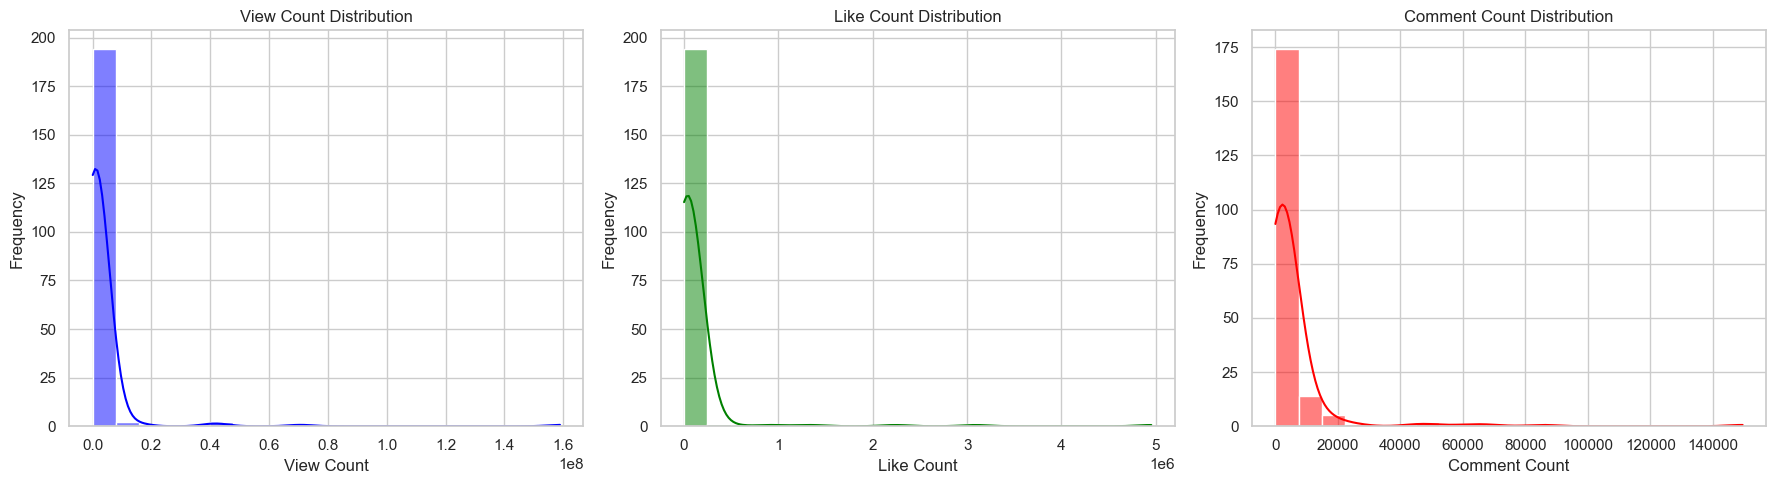

In [11]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

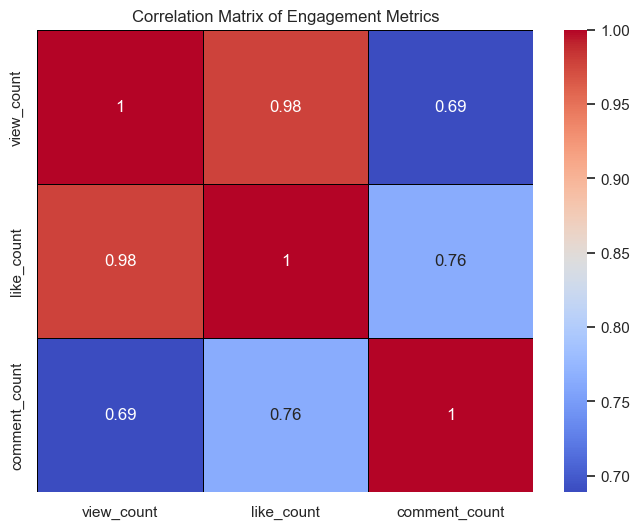

In [12]:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [13]:
from googleapiclient.discovery import build


youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\1211282388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


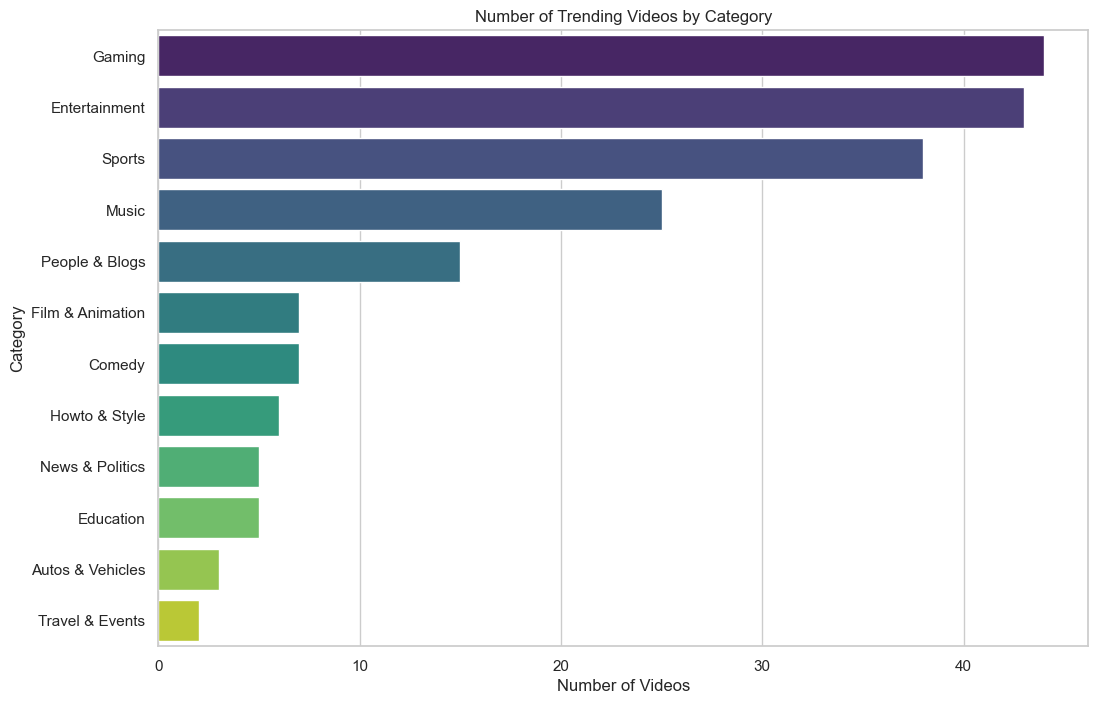

In [14]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\1218673062.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\1218673062.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\1218673062.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_e

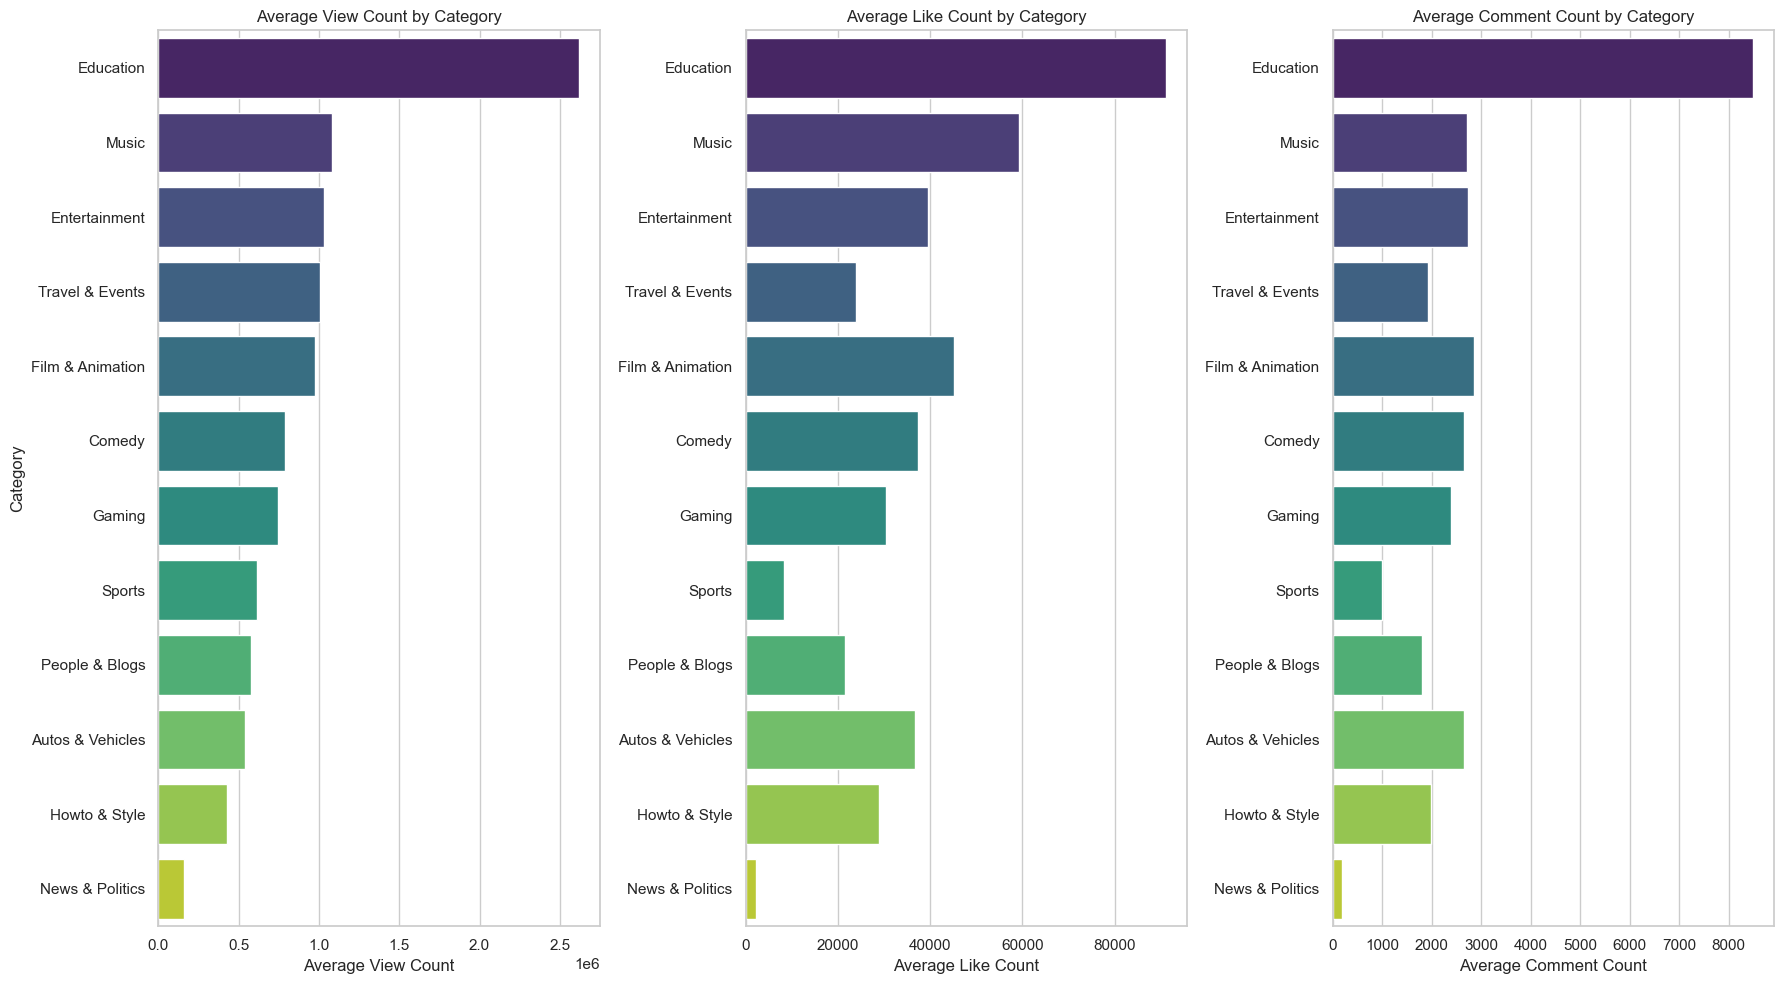

In [15]:
# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].median().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [16]:
#!pip install isodate

In [17]:
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

In [18]:
trending_videos.head(2)

,title,description,published_at,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,category_name,duration_seconds,duration_range
0,"Love Island’s JaNa Craig, Leah Kateb & Serena ...","It’s the GQ Friendship Quiz, Love Island USA e...",2024-08-19 17:00:03+00:00,GQ,24,"[couples quiz, friendship quiz, gq, gq magazin...",PT17M19S,hd,True,434554,32416,954,Entertainment,1039.0,10-20 min
1,We Trained For The OLYMPICS!,Welcome back guys!!! I think we need a bit mor...,2024-08-19 21:00:37+00:00,Kalogeras Sisters,24,[],PT33M36S,hd,False,785190,44675,4061,Entertainment,2016.0,20-60 min


In [19]:
counts = trending_videos.groupby(by = 'category_name').size()
print(counts.sort_values(ascending=False))

category_name
Gaming              44
Entertainment       43
Sports              38
Music               25
People & Blogs      15
Comedy               7
Film & Animation     7
Howto & Style        6
Education            5
News & Politics      5
Autos & Vehicles     3
Travel & Events      2
dtype: int64


In [20]:
duration_counts = trending_videos.groupby(by = 'duration_range').size()
print(duration_counts.sort_values(ascending=False))

duration_range
20-60 min     66
0-5 min       62
10-20 min     43
5-10 min      27
60-120 min     1
dtype: int64


C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\3687491052.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_counts = trending_videos.groupby(by = 'duration_range').size()


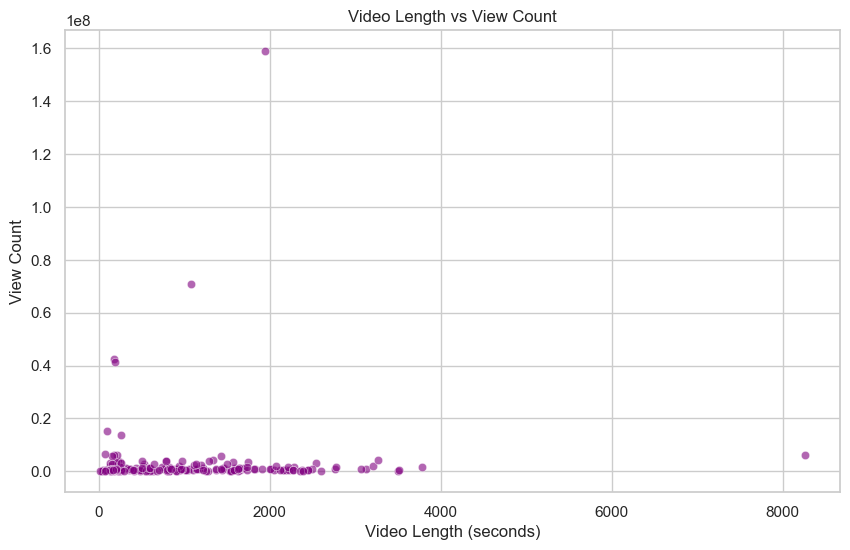

C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\4263121044.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\4263121044.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\4263121044.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=

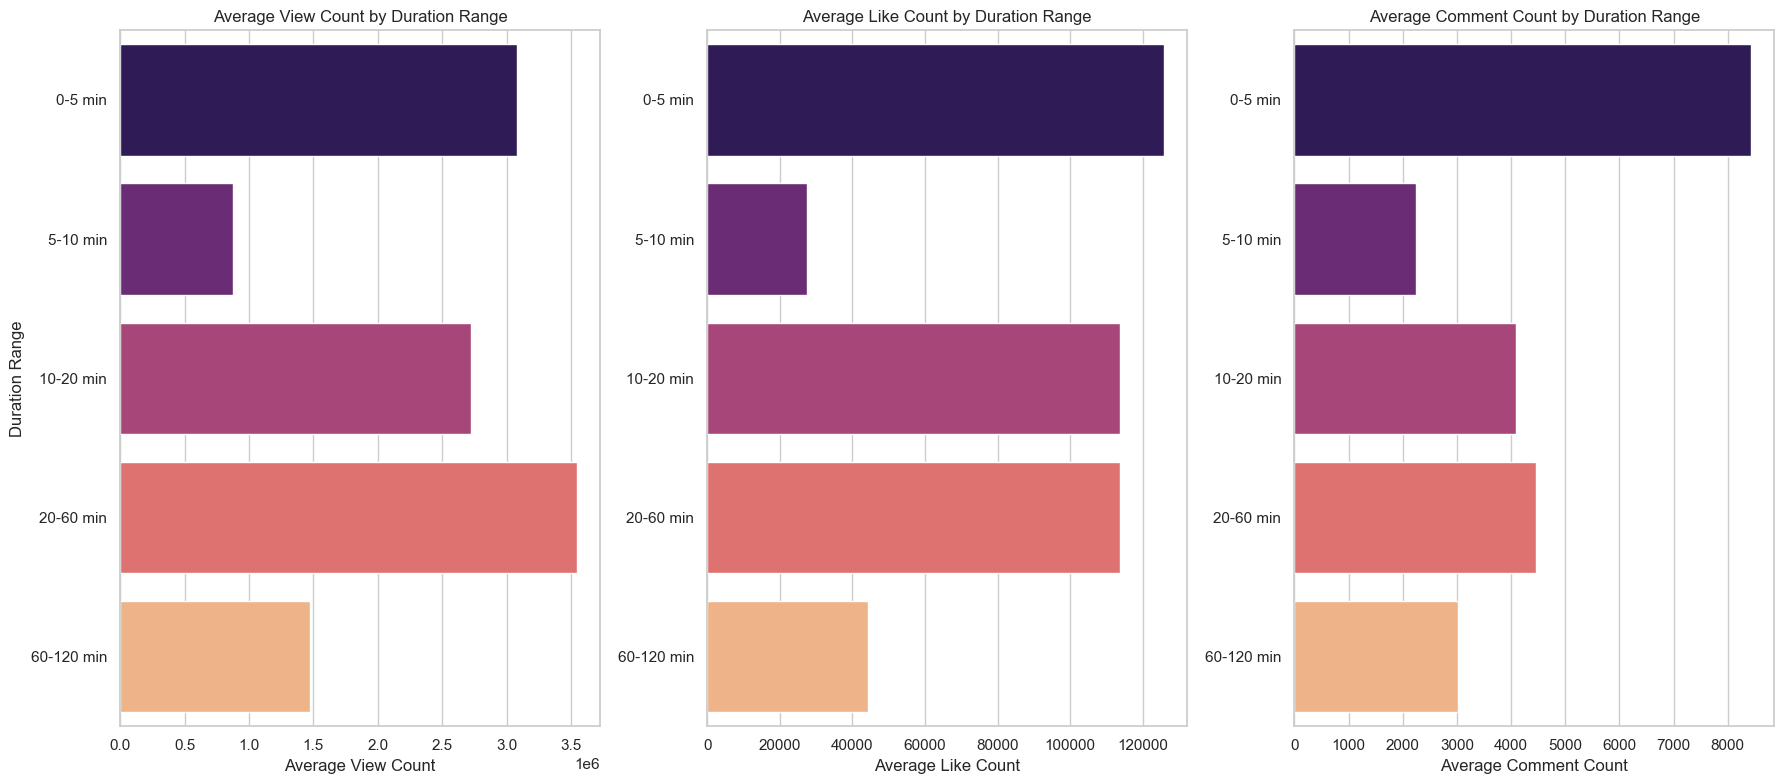

In [21]:
# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

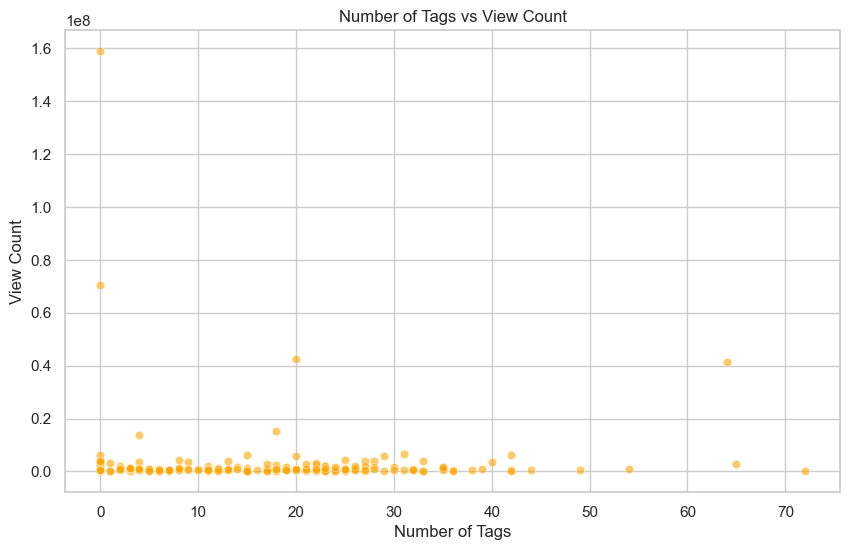

In [22]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\1314667626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


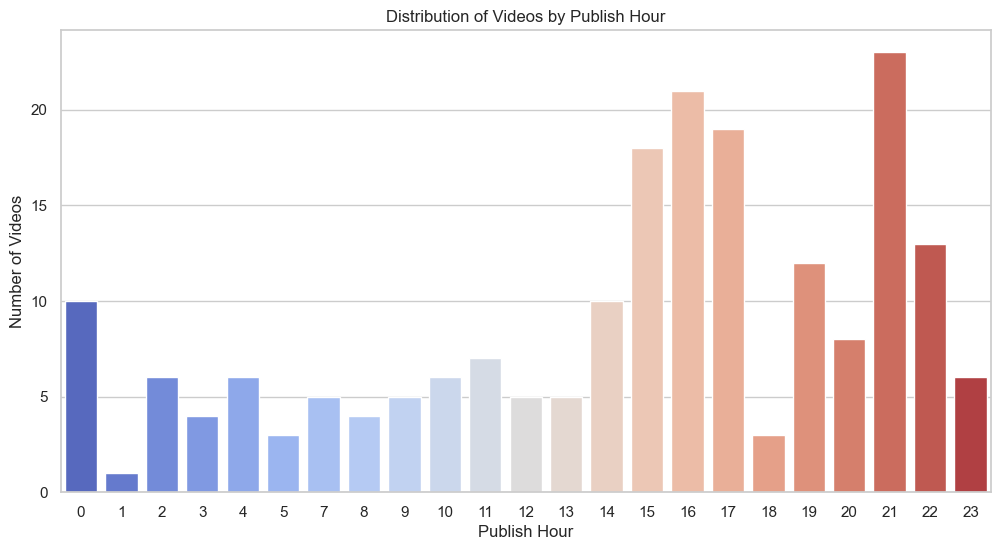

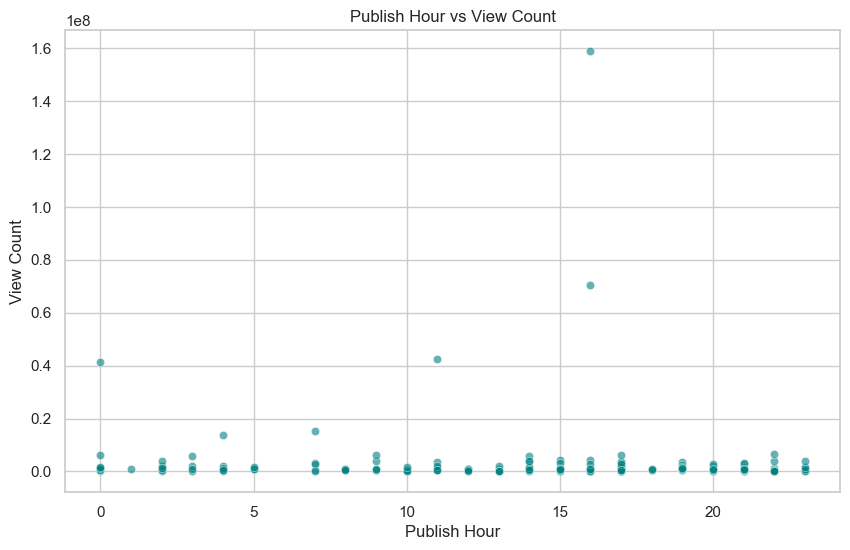

In [23]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()


NLP


In [26]:
#make a single list of all the tags 
all_tags = [tag for sublist in trending_videos['tags'] for tag in sublist]
all_tags = [tag.lower() for tag in all_tags]

In [27]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords if any
cleaned_tags = [tag for tag in all_tags if tag not in stop_words]

# Frequency analysis
tag_freq = Counter(cleaned_tags)

# Convert to DataFrame for easier handling
tag_freq_df = pd.DataFrame(tag_freq.items(), columns=['Tag', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(tag_freq_df)

                       Tag  Frequency
241               fortnite         12
639                  funny         11
1037                comedy          8
247                 gaming          7
580               football          7
...                    ...        ...
1006                  sdtv          1
1007  madden nfl 25 review          1
1008      madden 25 review          1
1009    madden 2025 review          1
2772                   pvp          1

[2773 rows x 2 columns]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


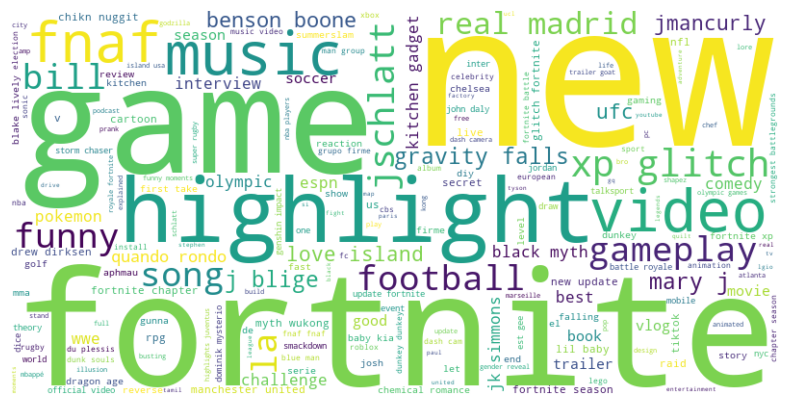

In [28]:

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_tags))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\3514176910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tag', data=tag_freq_df.head(10), palette='viridis')


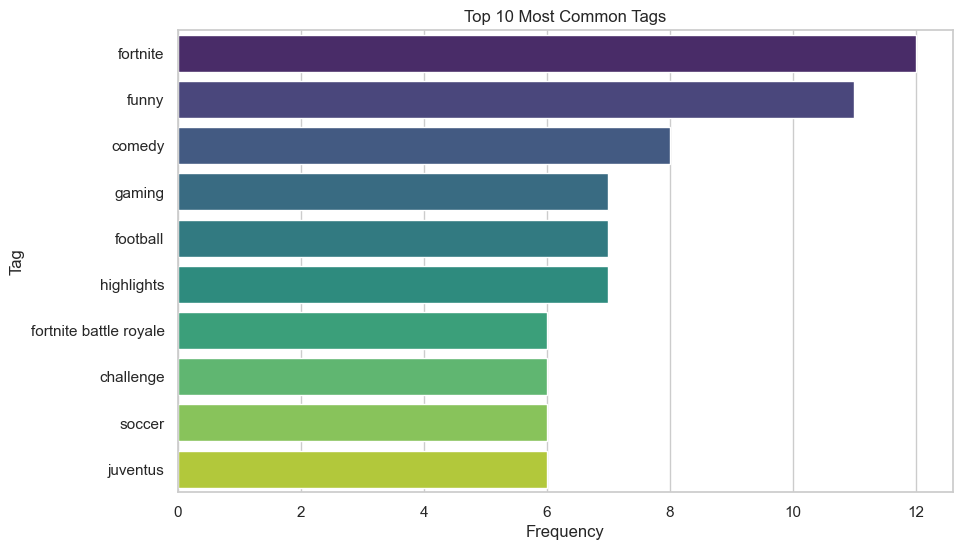

In [29]:
# Plot the frequency of the top tags
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Tag', data=tag_freq_df.head(10), palette='viridis')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()


In [30]:
# Convert list of tags into a single string for each entry
trending_videos['TagText'] = trending_videos['tags'].apply(lambda x: ' '.join(x))

print(trending_videos['TagText'])

0      couples quiz friendship quiz gq gq magazine ja...
1                                                       
2                               wifies mumbo jumbo dream
3      nintendo game fun video game action adventure ...
4      black myth wukong wukong dark souls dunk souls...
                             ...                        
195    gq gq magazine iconic characters j. k. simmons...
196    mythical kitchen mythical chef josh scherer ni...
197    MultiVersus Multiverses Multiverse Multi Versu...
198                                                     
199                                                     
Name: TagText, Length: 200, dtype: object


In [31]:
#pip install transformers


In [37]:
# Load pre-trained sentiment analysis pipeline
# Convert list of tags into a single string for each entry
trending_videos['TagText'] = trending_videos['tags'].apply(lambda x: ' '.join(x))

model_checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

sentiment_pipeline = pipeline(task="sentiment-analysis", model=model_checkpoint)
# Perform sentiment analysis
trending_videos['Sentiment'] = trending_videos['TagText'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

c:\Users\jenny\Youtube Data Analysis\myenv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jenny\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
All PyTorch model weights were used when initializing TFDistilBertForSequen

C:\Users\jenny\AppData\Local\Temp\ipykernel_25848\2693553023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trending_videos, x='Sentiment', palette='viridis')


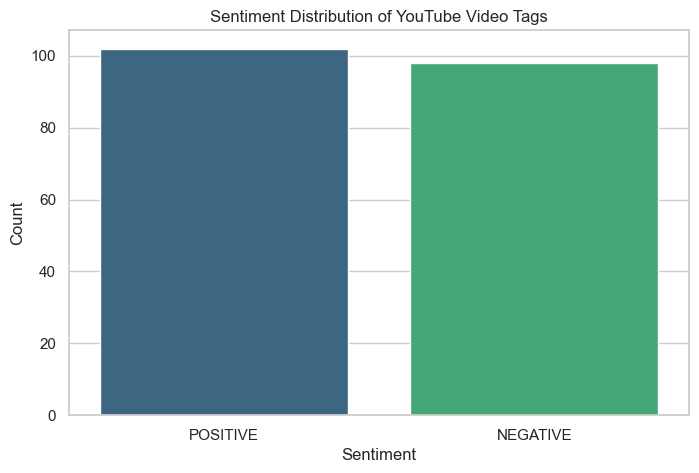

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=trending_videos, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution of YouTube Video Tags')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [48]:
positive_tags = trending_videos[trending_videos['Sentiment'] == 'POSITIVE']['TagText']
negative_tags = trending_videos[trending_videos['Sentiment'] == 'NEGATIVE']['TagText']


In [49]:
positive_tags

0      couples quiz friendship quiz gq gq magazine ja...
1                                                       
2                               wifies mumbo jumbo dream
3      nintendo game fun video game action adventure ...
6                                                       
                             ...                        
188    Atalanta CBS CBSGolazo CBSStudio ChampionsLeag...
194    Gunna YSL YSL Gunna Rap Music Atlanta Hip Hop ...
196    mythical kitchen mythical chef josh scherer ni...
198                                                     
199                                                     
Name: TagText, Length: 102, dtype: object

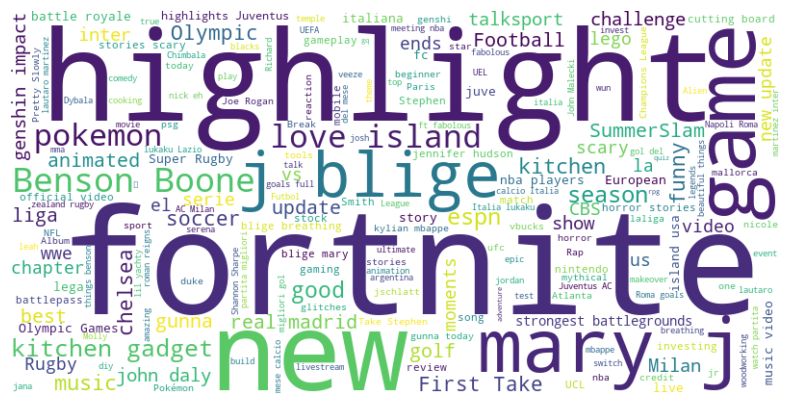

In [50]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tags))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

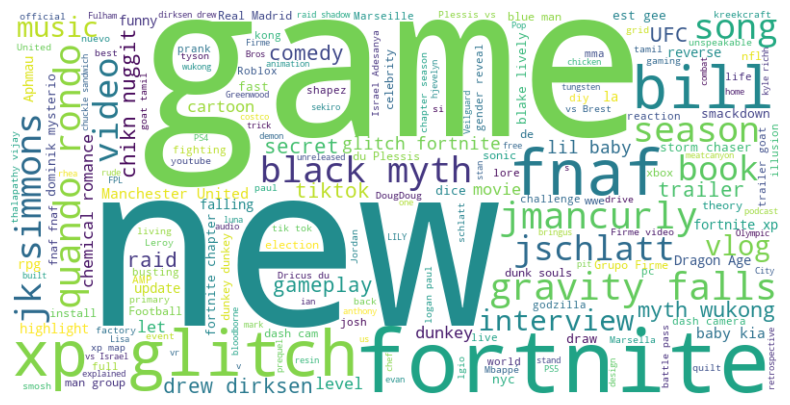

In [51]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tags))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
trending_videos.head()

,title,description,published_at,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,category_name,duration_seconds,duration_range,tag_count,publish_hour,TagText,Sentiment
0,"Love Island’s JaNa Craig, Leah Kateb & Serena ...","It’s the GQ Friendship Quiz, Love Island USA e...",2024-08-19 17:00:03+00:00,GQ,24,"[couples quiz, friendship quiz, gq, gq magazin...",PT17M19S,hd,True,434554,32416,954,Entertainment,1039.0,10-20 min,22,17,couples quiz friendship quiz gq gq magazine ja...,POSITIVE
1,We Trained For The OLYMPICS!,Welcome back guys!!! I think we need a bit mor...,2024-08-19 21:00:37+00:00,Kalogeras Sisters,24,[],PT33M36S,hd,False,785190,44675,4061,Entertainment,2016.0,20-60 min,0,21,,POSITIVE
2,AI Simulates Civilization in Minecraft,Three of the worlds most powerful AI models (C...,2024-08-19 15:00:24+00:00,Wifies,20,"[wifies, mumbo jumbo, dream]",PT27M36S,hd,False,606304,27380,2376,Gaming,1656.0,20-60 min,3,15,wifies mumbo jumbo dream,POSITIVE
3,Nintendo Museum Direct,Join us for a brief tour of the Nintendo Museu...,2024-08-19 22:17:03+00:00,Nintendo of America,20,"[nintendo, game, fun, video game, action, adve...",PT13M19S,hd,False,880007,54977,3256,Gaming,799.0,10-20 min,10,22,nintendo game fun video game action adventure ...,POSITIVE
4,Black Myth: Wukong,Travel across the world of Dr. Mundo in an att...,2024-08-19 19:30:02+00:00,videogamedunkey,20,"[black myth wukong, wukong, dark souls, dunk s...",PT5M59S,hd,False,821433,58865,2311,Gaming,359.0,5-10 min,26,19,black myth wukong wukong dark souls dunk souls...,NEGATIVE


In [54]:
trending_videos.to_csv("Youtube_analysis.csv", index=False)